In [10]:
pip install ucimlrepo pandas numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

#Fetching Breast Cancer Wisconsin (Diagnostic) dataset from UCI Machine Learning Repository
dataset=fetch_ucirepo(id=17)

x=dataset.data.features
y=dataset.data.targets

x=x.to_numpy()
y=y.to_numpy().reshape(-1)

print(x[:1])
print(y[:10])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]]
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']


In [32]:
y=np.where(y=='M',1,0)
print(y[:10])

[1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

print(x_train[:1])
print(x_test[:1])

# Adding a bias term (intercept) to the feature matrices
x_train=np.c_[np.ones(x_train.shape[0]),x_train]
x_test=np.c_[np.ones(x_test.shape[0]),x_test]

[[-1.44075296 -0.43531947 -1.36208497 -1.1391179   0.78057331  0.71892128
   2.82313451 -0.11914956  1.09266219  2.45817261 -0.26380039 -0.01605246
  -0.47041357 -0.47476088  0.83836493  3.25102691  8.43893667  3.39198733
   2.62116574  2.06120787 -1.23286131 -0.47630949 -1.24792009 -0.97396758
   0.72289445  1.18673232  4.67282796  0.9320124   2.09724217  1.88645014]]
[[-0.46649743 -0.13728933 -0.44421138 -0.48646498  0.28085007  0.04160589
  -0.11146496 -0.26486866  0.41524141  0.13513744 -0.02091509 -0.29323907
  -0.17460869 -0.2072995  -0.01181432 -0.35108921 -0.1810535  -0.24238831
  -0.33731758 -0.0842133  -0.2632354  -0.14784208 -0.33154752 -0.35109337
   0.48001942 -0.09649594 -0.03583041 -0.19435087  0.17275669  0.20372995]]


In [ ]:
def sigmoid_function(z):
    return 1/(1+np.exp(-z))

def batch_gradient_ascent(x,y,alpha=0.01,iterations=1000):
    m,n=x.shape
    theta=np.zeros(n)
    likelihoods=[]
    
    for _ in range(iterations):
        h=sigmoid_function(np.dot(x,theta))

        h=np.clip(h,1e-10,1-1e-10) # Epsilon to avoid log(0)

        gradient=np.dot(x.T,(y-h))

        theta+=(alpha*gradient)

        likelihood=np.sum(y*np.log(h)+(1-y)*np.log(1-h))
        likelihoods.append(likelihood)

    return theta, likelihoods

In [ ]:
theta,likelihoods=batch_gradient_ascent(x_train, y_train,alpha=0.001,iterations=1000)

def predict(x_test,theta,threshold=0.5):
    probabilities=sigmoid_function(np.dot(x_test,theta))
    return (probabilities>=threshold).astype(int)

y_pred=predict(x_test,theta)
accuracy=np.mean(y_pred==y_test)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.25%


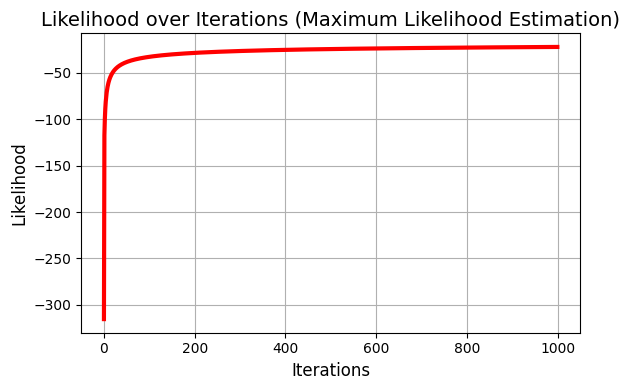

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(range(len(likelihoods)), likelihoods, color='red', linewidth=3)
plt.title('Likelihood over Iterations (Maximum Likelihood Estimation)', fontsize=14)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Likelihood', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()